# Decision Trees for Flag Data

## Import Packages

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

## Import and Inspect Data

In [2]:
flags = pd.read_csv("flags.csv", header = 0)

print(flags.head())
print(flags.info())

             Name  Landmass  Zone  Area  Population  Language  Religion  Bars  \
0     Afghanistan         5     1   648          16        10         2     0   
1         Albania         3     1    29           3         6         6     0   
2         Algeria         4     1  2388          20         8         2     2   
3  American-Samoa         6     3     0           0         1         1     0   
4         Andorra         3     1     0           0         6         0     3   

   Stripes  Colors  ...  Saltires  Quarters  Sunstars  Crescent  Triangle  \
0        3       5  ...         0         0         1         0         0   
1        0       3  ...         0         0         1         0         0   
2        0       3  ...         0         0         1         1         0   
3        0       5  ...         0         0         0         0         1   
4        0       3  ...         0         0         0         0         0   

   Icon  Animate Text  Topleft  Botright  
0     1

This data has 30 columns and 194 entries with no missing values.  Some columns relate to demographics of the country listed, but most describe the features of its flag.

## Predict Landmass by Color

In [4]:
## Analyze Landmass column
labels = flags['Landmass']
data = flags[["Red", "Green", "Blue", "Gold", "White", "Black", "Orange", "Circles", "Crosses","Saltires","Quarters","Sunstars", "Crescent","Triangle"]]

# Split data into training and test
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = .2, random_state=1)
print(len(train_data), len(train_labels))
print(len(test_data), len(test_labels))

155 155
39 39


The training set has 155 values and the test has 39.

## Fit Model

In [5]:
tree = DecisionTreeClassifier(random_state = 1)
tree.fit(train_data, train_labels)
print("Accuracy Score:")
tree.score(test_data, test_labels)

Accuracy Score:


0.46153846153846156

Let's see if we can improve our score with pruning.

## Prune the Model to Improve its Fit

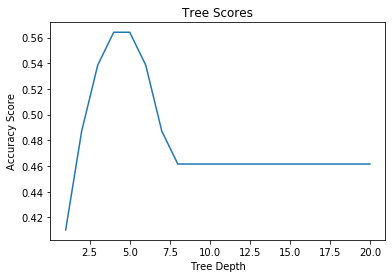

In [8]:
## Find the Optimal Tree Depth
scores = []
for i in range(1, 21):
    tree = DecisionTreeClassifier(random_state = 1, max_depth = i)
    tree.fit(train_data, train_labels)
    scores.append(tree.score(test_data, test_labels))
plt.plot(range(1, 21), scores)
plt.title('Tree Scores')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy Score")
plt.show()

It appears that the optimal tree depth is around 5, which would give us an accuracy score of about 0.56.